<a href="https://colab.research.google.com/github/ap3s-plan3t/EKPA-I3593-C1-U4/blob/main/Ekpa_CybAI_tzortzis_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [ ]:
#εισαγωγή βιβλιοθηκών - πακέτων / εισαγωγή του πακέτου ECOD - αφαίρεση του πακέτου IForest
import pandas as pd
from sklearn.preprocessing import StandardScaler
from __future__ import division
from __future__ import print_function
import os
import sys
import matplotlib.pyplot as plt

In [ ]:
#εισαγωγή του συνόλου δεδομένων - παρέμεινε το ίδιο datashet
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [ ]:
#εξαγωγή χαρακτηριστικών (ανεξάρτητων μεταβλητών) για την αναγνώριση ανωμαλιών
features = ['src_port', 'dest_port', 'packet_size', 'num_packets',
            'flow_duration', 'bytes_transferred', 'packet_rate']

X = network_data[features].values

In [ ]:
# Import the necessary library for scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the network data
network_data_scaled = scaler.fit_transform(network_data.select_dtypes(include=['number']))

In [ ]:
# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [ ]:
if __name__ == "__main__":
    contamination = 0.02  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

In [ ]:
# Generate sample data
X_train, X_test, y_train, y_test = generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

In [ ]:
# train ECOD detector
clf_name = 'ECOD'
clf = ECOD()
clf.fit(X_train)

ECOD(contamination=0.1, n_jobs=1)

In [ ]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.predict(X_train)
y_train_scores = clf.decision_function(X_train)

In [ ]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

In [ ]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
ECOD ROC:0.9987, precision @ rank n:0.75

On Test Data:
ECOD ROC:1.0, precision @ rank n:1.0


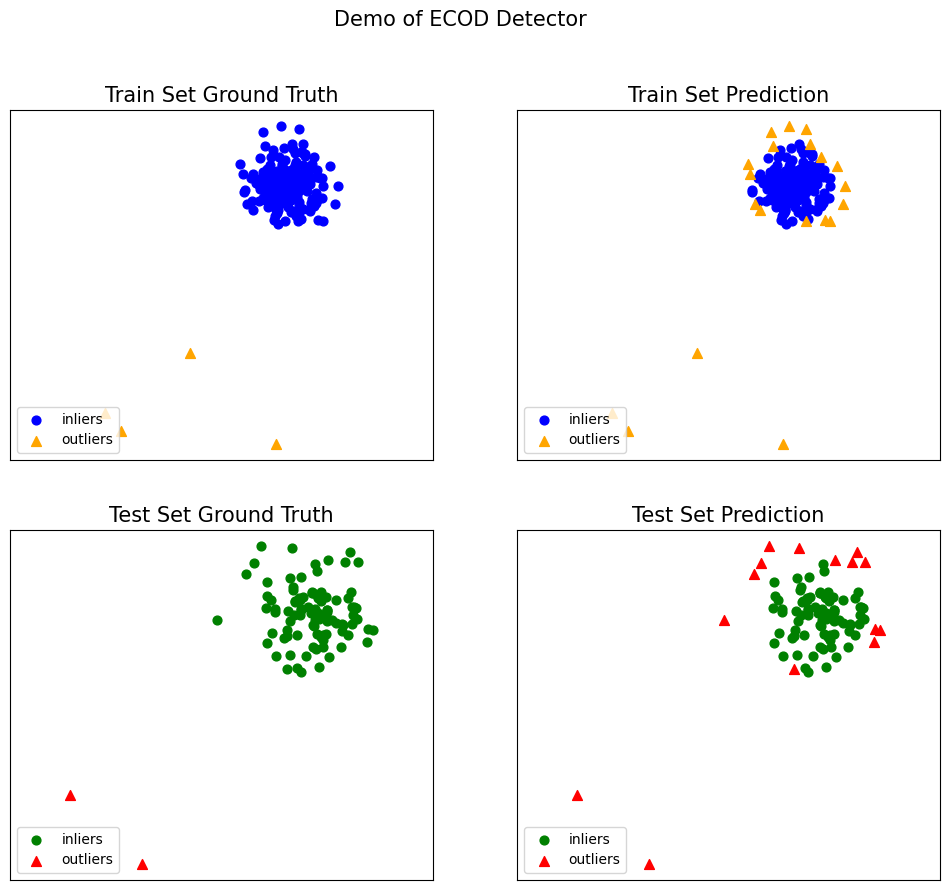

In [ ]:
# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
y_test_pred, show_figure=True, save_figure=False)

In [ ]:
# Calculate the anomaly scores using your model
network_data['anomaly_score'] = clf.decision_function(network_data_scaled[:, :X_train.shape[1]])

In [ ]:
# Print the values that were identified as anomalies
print(network_data[network_data['anomaly_score'] > clf.threshold_]) # Use 'clf' instead of 'model'
anomalies = network_data[network_data['anomaly_score'] > clf.threshold_]
print("Detected Anomalies:")
print(anomalies)

             src_ip         dest_ip  src_port  dest_port protocol  \
12    167.97.11.236  232.126.87.193      1177      21829     ICMP   
23    245.149.68.55     14.99.31.95      1810      14914      UDP   
52    233.102.16.13   78.214.13.214     40496       1978     ICMP   
57     14.119.240.3   156.201.16.65      1167      63332     ICMP   
63    140.17.159.95     88.34.207.1     12421       4151     ICMP   
..              ...             ...       ...        ...      ...   
942   95.227.238.93  180.15.235.122     52612       2233     ICMP   
959   112.102.90.89   206.35.108.54     38703       1352      UDP   
971  25.114.146.108   70.89.225.157      6494       4699      UDP   
989   248.187.53.69    136.67.80.16      3088      62265      TCP   
991  134.102.165.84  167.185.202.84     11590       1052      UDP   

     packet_size  num_packets  flow_duration  bytes_transferred  packet_rate  \
12      1.311241           17             57              37007         2422   
23      1.4